# DSCI 592 Capstone II: Group Project
## Team: Safe CIty
## NY-Queens (Regression)

In [1]:
# Common imports
import numpy as np
import pandas as pd
import seaborn as sns

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler
from sklearn.decomposition import PCA

# to make this notebook's output identical at every run
np.random.seed(42)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## 1. Preparing data

In [2]:
# Import the data as Pandas DataFrame as follows
df = pd.read_csv("df_queens_k4.csv")

In [3]:
df.head()

,FELONY,MISDEMEANOR,VIOLATION,Crime,zip,latitude,longitude,K_mean
0,473,588,252,1313,11004,40.744585,-73.712026,1
1,4698,7885,2572,15155,11101,40.749188,-73.940684,0
2,2099,3569,1210,6878,11102,40.771185,-73.926525,2
3,2909,5790,1252,9951,11103,40.762818,-73.914699,2
4,967,1632,679,3278,11104,40.744165,-73.920746,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FELONY       57 non-null     int64  
 1   MISDEMEANOR  57 non-null     int64  
 2   VIOLATION    57 non-null     int64  
 3   Crime        57 non-null     int64  
 4   zip          57 non-null     int64  
 5   latitude     57 non-null     float64
 6   longitude    57 non-null     float64
 7   K_mean       57 non-null     int64  
dtypes: float64(2), int64(6)
memory usage: 3.7 KB


## 2. Split train-target data

In [5]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.3, random_state=40)
#train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [6]:
train_set.head()

,FELONY,MISDEMEANOR,VIOLATION,Crime,zip,latitude,longitude,K_mean
11,1471,1831,827,4129,11357,40.785551,-73.811385,1
53,6680,9044,3799,19523,11691,40.600827,-73.758037,0
52,1603,2241,754,4598,11436,40.675948,-73.795680,3
47,2035,2595,945,5575,11429,40.709838,-73.739996,1
38,2295,4515,1423,8233,11418,40.698236,-73.831900,3


In [7]:
test_set.head()

,FELONY,MISDEMEANOR,VIOLATION,Crime,zip,latitude,longitude,K_mean
4,967,1632,679,3278,11104,40.744165,-73.920746,2
26,2444,5488,1237,9169,11375,40.722861,-73.846444,2
42,1952,2344,1217,5513,11422,40.661532,-73.734977,3
56,1131,1880,709,3720,11694,40.579815,-73.836725,3
16,1280,1154,530,2964,11364,40.746906,-73.758677,1


### Numerical variables
- latitude
- longitude

### Categorical variables
- K-mean (Cluster using K-mean)

### Targer
- Target variables: number of crimes

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_features = ["latitude", "longitude"]

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = ["K_mean"]
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

full_pipeline = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

train_prepared = full_pipeline.fit_transform(train_set)
test_prepared = full_pipeline.fit_transform(test_set)

In [9]:
# Need to check the shape of train and test data, since C3 has only  2 points.
train_prepared.shape

(39, 6)

In [10]:
test_prepared.shape

(18, 6)

In [11]:
# Save labels (target)
train_labels = train_set["Crime"].copy()
test_labels = test_set["Crime"].copy() 

## 3. Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
# Train LinearRegressor
lin_reg = LinearRegression()
lin_reg.fit(train_prepared, train_labels)

LinearRegression()

In [13]:
from sklearn.metrics import mean_squared_error
lin_train_pred = lin_reg.predict(train_prepared)
lin_mse_train = mean_squared_error(train_labels, lin_train_pred)
lin_rmse_train = np.sqrt(lin_mse_train)
lin_rmse_train

2071.575288618857

In [14]:
train_predictions = lin_reg.predict(train_prepared)

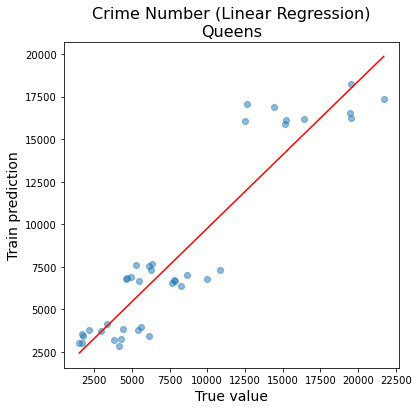

In [15]:
fig = plt.figure(figsize=(6, 6))
_ = plt.scatter(train_labels, lin_train_pred, alpha=0.5)
_ = plt.xlabel("True value", fontsize=14)
_ = plt.ylabel("Train prediction", fontsize=14)
_ = plt.title("Crime Number (Linear Regression)\nQueens",fontsize=16)

#Fitted line
line = LinearRegression()
line.fit(np.array(train_labels).reshape(-1,1), train_predictions)
b = line.intercept_
a = line.coef_[0]
x = np.linspace(min(train_labels),max(train_labels),100)
y = a*x+b
_ = plt.plot(x,y,'-r')

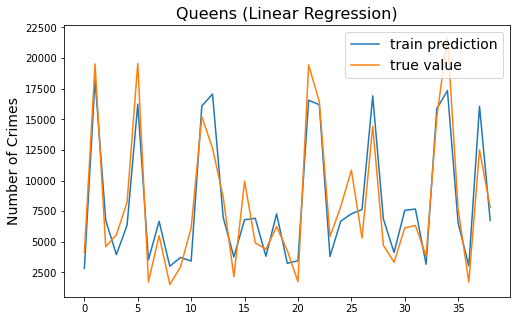

In [16]:
fig = plt.figure(figsize=(8, 5))
_ = plt.plot(range(len(train_prepared)), train_predictions, label="train prediction")
_ = plt.plot(range(len(train_prepared)), train_labels, label="true value")
_ = plt.legend(fontsize=14)
_ = plt.ylabel("Number of Crimes",fontsize=14)
_ = plt.title("Queens (Linear Regression)",fontsize=16)

In [17]:
test_predictions = lin_reg.predict(test_prepared)

In [18]:
lin_mse_test = mean_squared_error(test_labels, test_predictions)
lin_rmse_test = np.sqrt(lin_mse_test)
lin_rmse_test

2814.5302841530583

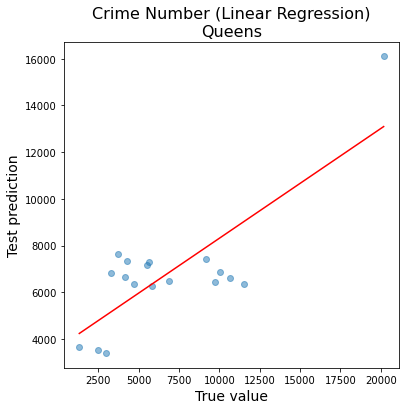

In [19]:
fig = plt.figure(figsize=(6, 6))
_ = plt.scatter(test_labels,test_predictions, alpha=0.5)
#plt.xlim([0,800])
#plt.ylim([0,800])
plt.xlabel("True value", fontsize=14)
_ = plt.ylabel("Test prediction", fontsize=14)
_ = plt.title("Crime Number (Linear Regression)\nQueens",fontsize=16)

#Fitted line
line = LinearRegression()
line.fit(np.array(test_labels).reshape(-1,1), test_predictions)
b = line.intercept_
a = line.coef_[0]
x = np.linspace(min(test_labels),max(test_labels),100)
y = a*x+b
_ = plt.plot(x,y,'-r')

In [20]:
from scipy.stats import pearsonr
corr, _ = pearsonr(test_predictions, test_labels)
r2 = corr**2
r2

0.6328091244604171

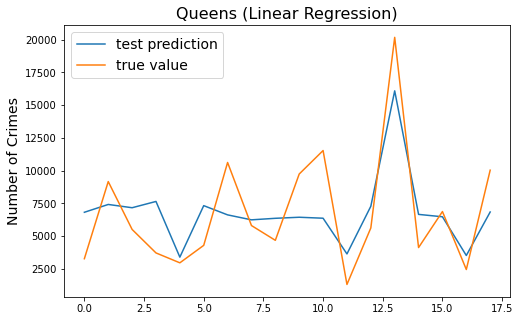

In [21]:
fig = plt.figure(figsize=(8, 5))
_ = plt.plot(range(len(test_prepared)), test_predictions, label="test prediction")
_ = plt.plot(range(len(test_prepared)), test_labels, label="true value")
_ = plt.legend(fontsize=14)
_ = plt.ylabel("Number of Crimes",fontsize=14)
_ = plt.title("Queens (Linear Regression)",fontsize=16)

## 4. Random Forest Model

In [22]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(train_prepared, train_labels)

RandomForestRegressor(random_state=42)

In [23]:
from sklearn.metrics import mean_squared_error
rf_train_pred = forest_reg.predict(train_prepared)
rf_mse_train = mean_squared_error(train_labels, rf_train_pred)
rf_rmse_train = np.sqrt(lin_mse_train)
rf_rmse_train

2071.575288618857

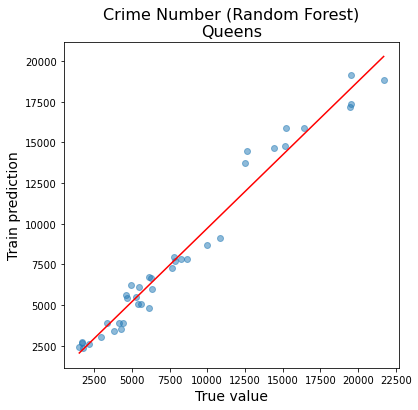

In [24]:
fig = plt.figure(figsize=(6, 6))
_ = plt.scatter(train_labels, rf_train_pred, alpha=0.5)
_ = plt.xlabel("True value", fontsize=14)
_ = plt.ylabel("Train prediction", fontsize=14)
_ = plt.title("Crime Number (Random Forest)\nQueens", fontsize = 16)

#Fitted line
line = LinearRegression()
line.fit(np.array(train_labels).reshape(-1,1), rf_train_pred)
b = line.intercept_
a = line.coef_[0]
x = np.linspace(min(train_labels),max(train_labels),100)
y = a*x+b
_ = plt.plot(x,y,'-r')

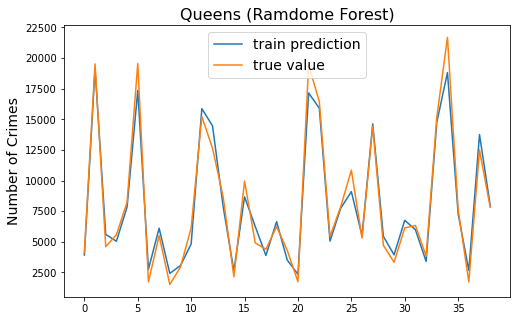

In [25]:
fig = plt.figure(figsize=(8, 5))
_ = plt.plot(range(len(train_prepared)), rf_train_pred, label="train prediction")
_ = plt.plot(range(len(train_prepared)), train_labels, label="true value")
_ = plt.legend(fontsize=14)
_ = plt.ylabel("Number of Crimes",fontsize=14)
_ = plt.title("Queens (Ramdome Forest)",fontsize=16)

In [26]:
rf_test_pred = forest_reg.predict(test_prepared)
rf_mse_test = mean_squared_error(test_labels, rf_test_pred)
rf_rmse_test = np.sqrt(rf_mse_test)
rf_rmse_test

3026.5843035223347

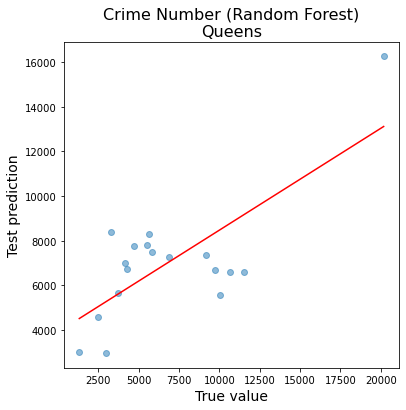

In [27]:
fig = plt.figure(figsize=(6, 6))
_ = plt.scatter(test_labels, rf_test_pred, alpha=0.5)
_ = plt.xlabel("True value", fontsize=14)
_ = plt.ylabel("Test prediction", fontsize=14)
_ = plt.title("Crime Number (Random Forest)\nQueens", fontsize = 16)

#Fitted line
lr = LinearRegression()
lr.fit(np.array(test_labels).reshape(-1,1), rf_test_pred)
b = lr.intercept_
a = lr.coef_[0]
x = np.linspace(min(test_labels),max(test_labels),100)
y = a*x+b
_ = plt.plot(x,y,'-r')

In [28]:
from scipy.stats import pearsonr
corr, _ = pearsonr(rf_test_pred, test_labels)
r2_rf = corr**2
r2_rf

0.5437420674727078

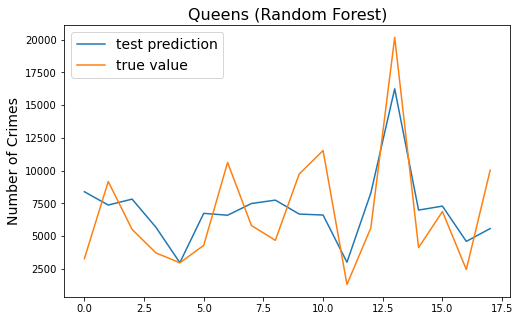

In [29]:
fig = plt.figure(figsize=(8, 5))
_ = plt.plot(range(len(test_prepared)), rf_test_pred, label="test prediction")
_ = plt.plot(range(len(test_prepared)), test_labels, label="true value")
_ = plt.legend(fontsize=14)
_ = plt.ylabel("Number of Crimes",fontsize=14)
_ = plt.title("Queens (Random Forest)",fontsize=16)